# Proyek Analisis Data: BIKE SHARING DATASETS
- **Nama:** RIDHO ALAMSYAH
- **Email:** ridhoalamsyahcilik@gmail.com
- **ID Dicoding:** Ridho Alamsyah

## Menentukan Pertanyaan Bisnis

- Bagaimana trend pengguna sepeda casual & register pada tahun 2011 dan 2012 ?
- bagaimana pengaruh cuaca pada jumlah pengguna sepeda ?
- Pada jam  berapa pengguna layanan sepeda  paling banyak digunakan ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install pipreqs

In [3]:
with open('requirements.txt', 'w') as f:
    f.write('numpy==1.24.3\n')
    f.write('pandas==2.0.3\n')
    f.write('matplotlib==3.7.1\n')
    f.write('seaborn==0.12.2\n')


In [4]:
!pipreqs .

INFO: Not scanning for jupyter notebooks.


## Data Wrangling

### Gathering Data

In [5]:
df_hari = pd.read_csv('data/day.csv')
df_hari.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df_jam = pd.read_csv('data/hour.csv')
df_jam.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


--DESKRIPSI DATASETS--

  - instant: indeks catatan
  - dteday : tangga
  - season : musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
  - yr : tahun (0: 2011, 1: 2012)
  - bulan : bulan (1 sampai 12)
  - hr : jam (0 hingga 23)
  - holiday : hari cuaca hari libur atau tidak
  - hari kerja : hari dalam seminggu
  - hari kerja : jika hari tersebut bukan akhir pekan atau hari libur maka nilainya 1, jika tidak maka nilainya 0.
  + cuaca :
  
		- 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
		- 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
		- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan
		- 4: Hujan Lebat + Butiran Es + Badai Petir + Kabut, Salju + Kabut
  
  - temp: Suhu yang dinormalisasi dalam Celcius. Nilai dibagi menjadi 41 (maks
  - atemp: Suhu perasaan yang dinormalisasi dalam Celcius. Nilai dibagi menjadi 50 (maks)
  - hum: Kelembapan yang dinormalisasi. Nilai dibagi menjadi 100 (maks)
  - windspeed: Kecepatan angin yang dinormalisasi. Nilai dibagi menjadi 67 (maks)
  - casual: jumlah pengguna biasa
  - terdaftar: jumlah pengguna terdaftar
  - cnt: jumlah total sepeda sewaan termasuk yang kasual dan terdaftar


### Assessing Data

ASSESING DATA df_hari

In [7]:
df_hari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


terdapat kesalahan pada kolom dteday yang seharusnya bertipe data date time

In [8]:
df_hari.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
df_hari.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
print("jumlah data duplikasi df hari =",df_hari.duplicated().sum())

jumlah data duplikasi df hari = 0


In [11]:
df_hari.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


ASSESING DATA df_jam

In [12]:
df_jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


terdapat kesalahan pada kolom dteday yang seharusnya bertipe dara datetime

In [13]:
df_jam.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [14]:
df_jam.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [15]:
print("jumlah data duplikasi df jam =",df_jam.duplicated().sum())

jumlah data duplikasi df jam = 0


In [16]:
df_jam.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- df_day = terdapat kesalahan pada kolom dateday yang seharusnya bertipe data date time
- df_hour = terdapat kesalahan pada kolom dateday yang seharusnya bertipe data date time

### Cleaning Data

MERUBAH NAMA KOLOM df_day

In [17]:
df_hari.rename(columns={'dteday':'tanggal',
                        'yr':'tahun',
                        'mnth':'bulan',
                        'season': 'musim',
                        'hr': 'jam',
                        'cnt' :'jumlah',
                       'casual': 'pelanggan nonregis',
                       'registered':'pelanggan register',},inplace=True)

In [18]:
df_hari['tanggal'] = pd.to_datetime(df_hari['tanggal'])
df_hari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   instant             731 non-null    int64         
 1   tanggal             731 non-null    datetime64[ns]
 2   musim               731 non-null    int64         
 3   tahun               731 non-null    int64         
 4   bulan               731 non-null    int64         
 5   holiday             731 non-null    int64         
 6   weekday             731 non-null    int64         
 7   workingday          731 non-null    int64         
 8   weathersit          731 non-null    int64         
 9   temp                731 non-null    float64       
 10  atemp               731 non-null    float64       
 11  hum                 731 non-null    float64       
 12  windspeed           731 non-null    float64       
 13  pelanggan nonregis  731 non-null    int64         

In [19]:
df_hari.head()

,instant,tanggal,musim,tahun,bulan,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,pelanggan nonregis,pelanggan register,jumlah
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
df_hari['tahun']=  df_hari['tahun'].map({
    0: 2011,
    1: 2012
})

df_hari.head()

,instant,tanggal,musim,tahun,bulan,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,pelanggan nonregis,pelanggan register,jumlah
0,1,2011-01-01,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [21]:
df_hari['bulan'] = df_hari['bulan'].map({
    1: 'Januari',
    2: 'Februari',
    3 : 'Maret',
    4 : 'April',
    5 : 'Mei',
    6 : 'Juni',
    7 : 'Juli',
    8 : 'Agustus',
    9 : 'September',
    10 : 'Oktober',
    11 : 'November',
    12 : 'Desember'
})

df_hari.head()

,instant,tanggal,musim,tahun,bulan,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,pelanggan nonregis,pelanggan register,jumlah
0,1,2011-01-01,1,2011,Januari,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,Januari,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,Januari,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,Januari,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,Januari,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
df_hari['weekday']= df_hari['weekday'].map({
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3 : 'Rabu',
    4 : 'Kamis',
    5 : 'Jumat',
    6 : 'Sabtu'
})

df_hari.head()

,instant,tanggal,musim,tahun,bulan,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,pelanggan nonregis,pelanggan register,jumlah
0,1,2011-01-01,1,2011,Januari,0,Sabtu,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,Januari,0,Minggu,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,Januari,0,Senin,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,Januari,0,Selasa,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,Januari,0,Rabu,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [23]:
df_hari['musim'] = df_hari['musim'].map({
    1: 'Musim Semi',
    2: 'Musim Panas',
    3 : 'Musim Gugur',
    4 : 'Musim Dingin'
})

df_hari.head()

,instant,tanggal,musim,tahun,bulan,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,pelanggan nonregis,pelanggan register,jumlah
0,1,2011-01-01,Musim Semi,2011,Januari,0,Sabtu,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,2011,Januari,0,Minggu,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,2011,Januari,0,Senin,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,Januari,0,Selasa,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,Januari,0,Rabu,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [24]:
df_hari['weathersit'] = df_hari['weathersit'].map({
    1: 'Cerah',
    2: 'Kabut',
    3 : 'Salju',
    4 : 'Hujan/ekstrem'
})

df_hari.head()

,instant,tanggal,musim,tahun,bulan,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,pelanggan nonregis,pelanggan register,jumlah
0,1,2011-01-01,Musim Semi,2011,Januari,0,Sabtu,0,Kabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,2011,Januari,0,Minggu,0,Kabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,2011,Januari,0,Senin,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,Januari,0,Selasa,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,Januari,0,Rabu,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


MERUBAH NAMA KOLOM df_hour

In [25]:
df_jam.rename(columns={'dteday':'tanggal',
                        'yr':'tahun',
                        'mnth':'bulan',
                        'season': 'musim',
                        'hr': 'jam',
                        'cnt' :'jumlah',
                       'casual': 'pelanggan nonregis',
                       'registered':'pelanggan register'},inplace=True)

In [26]:
df_jam['tanggal'] = pd.to_datetime(df_jam['tanggal'])
df_jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   instant             17379 non-null  int64         
 1   tanggal             17379 non-null  datetime64[ns]
 2   musim               17379 non-null  int64         
 3   tahun               17379 non-null  int64         
 4   bulan               17379 non-null  int64         
 5   jam                 17379 non-null  int64         
 6   holiday             17379 non-null  int64         
 7   weekday             17379 non-null  int64         
 8   workingday          17379 non-null  int64         
 9   weathersit          17379 non-null  int64         
 10  temp                17379 non-null  float64       
 11  atemp               17379 non-null  float64       
 12  hum                 17379 non-null  float64       
 13  windspeed           17379 non-null  float64   

In [27]:
df_jam.head()

,instant,tanggal,musim,tahun,bulan,jam,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,pelanggan nonregis,pelanggan register,jumlah
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [28]:
df_jam['tahun']=  df_jam['tahun'].map({
    0: 2011,
    1: 2012
})

df_jam.head()

,instant,tanggal,musim,tahun,bulan,jam,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,pelanggan nonregis,pelanggan register,jumlah
0,1,2011-01-01,1,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [29]:
df_jam['bulan'] = df_jam['bulan'].map({
    1: 'Januari',
    2: 'Februari',
    3 : 'Maret',
    4 : 'April',
    5 : 'Mei',
    6 : 'Juni',
    7 : 'Juli',
    8 : 'Agustus',
    9 : 'September',
    10 : 'Oktober',
    11 : 'November',
    12 : 'Desember'
})

df_jam.head()

,instant,tanggal,musim,tahun,bulan,jam,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,pelanggan nonregis,pelanggan register,jumlah
0,1,2011-01-01,1,2011,Januari,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,Januari,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2011,Januari,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,2011,Januari,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,2011,Januari,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [30]:
df_jam['weekday']= df_jam['weekday'].map({
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3 : 'Rabu',
    4 : 'Kamis',
    5 : 'Jumat',
    6 : 'Sabtu'
})

df_jam.head()

,instant,tanggal,musim,tahun,bulan,jam,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,pelanggan nonregis,pelanggan register,jumlah
0,1,2011-01-01,1,2011,Januari,0,0,Sabtu,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,Januari,1,0,Sabtu,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2011,Januari,2,0,Sabtu,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,2011,Januari,3,0,Sabtu,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,2011,Januari,4,0,Sabtu,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [31]:
df_jam['musim'] = df_jam['musim'].map({
    1: 'Musim Semi',
    2: 'Musim Panas',
    3 : 'Musim Gugur',
    4 : 'Musim Dingin'
})

df_jam.head()

,instant,tanggal,musim,tahun,bulan,jam,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,pelanggan nonregis,pelanggan register,jumlah
0,1,2011-01-01,Musim Semi,2011,Januari,0,0,Sabtu,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Musim Semi,2011,Januari,1,0,Sabtu,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Musim Semi,2011,Januari,2,0,Sabtu,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Musim Semi,2011,Januari,3,0,Sabtu,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Musim Semi,2011,Januari,4,0,Sabtu,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [32]:
df_jam['weathersit'] = df_jam['weathersit'].map({
    1: 'Cerah',
    2: 'Kabut',
    3 : 'Salju',
    4 : 'Hujan/ekstrem'
})

df_jam.head()

,instant,tanggal,musim,tahun,bulan,jam,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,pelanggan nonregis,pelanggan register,jumlah
0,1,2011-01-01,Musim Semi,2011,Januari,0,0,Sabtu,0,Cerah,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Musim Semi,2011,Januari,1,0,Sabtu,0,Cerah,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Musim Semi,2011,Januari,2,0,Sabtu,0,Cerah,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Musim Semi,2011,Januari,3,0,Sabtu,0,Cerah,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Musim Semi,2011,Januari,4,0,Sabtu,0,Cerah,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore df_hari

In [33]:
df_hari.groupby('musim').agg({
    'pelanggan nonregis':'sum',
    'pelanggan register':'sum',
    'jumlah':'sum'
})

,pelanggan nonregis,pelanggan register,jumlah
musim,,,
Musim Dingin,129782,711831,841613
Musim Gugur,226091,835038,1061129
Musim Panas,203522,715067,918589
Musim Semi,60622,410726,471348


In [34]:
df_hari.groupby('tahun').agg({
  'pelanggan nonregis':'sum',
  'pelanggan register':'sum',
  'jumlah':'sum'
})

,pelanggan nonregis,pelanggan register,jumlah
tahun,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


In [35]:
df_hari.groupby('bulan').agg({
  'pelanggan nonregis':'sum',
  'pelanggan register':'sum',
  'jumlah':'sum'
})

,pelanggan nonregis,pelanggan register,jumlah
bulan,,,
Agustus,72039,279155,351194
April,60802,208292,269094
Desember,21693,189343,211036
Februari,14963,136389,151352
Januari,12042,122891,134933
Juli,78157,266791,344948
Juni,73906,272436,346342
Maret,44444,184476,228920
Mei,75285,256401,331686


In [36]:
df_hari.groupby('weekday').agg({
  'pelanggan nonregis':'sum',
  'pelanggan register':'sum',
  'jumlah':'sum'
})

,pelanggan nonregis,pelanggan register,jumlah
weekday,,,
Jumat,78238,409552,487790
Kamis,61460,423935,485395
Minggu,140521,303506,444027
Rabu,57319,415729,473048
Sabtu,153852,323955,477807
Selasa,57843,411266,469109
Senin,70784,384719,455503


In [37]:
df_hari.groupby('weathersit').agg({
  'pelanggan nonregis':'sum',
  'pelanggan register':'sum',
})

,pelanggan nonregis,pelanggan register
weathersit,,
Cerah,446346,1811606
Kabut,169776,827082
Salju,3895,33974


### Explore df_jam

In [38]:
df_jam.groupby('jam').agg({
    'pelanggan nonregis':'sum',
    'pelanggan register':'sum',
    'jumlah':'sum'
})

,pelanggan nonregis,pelanggan register,jumlah
jam,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428
5,1012,13249,14261
6,3017,52115,55132
7,8037,146134,154171
8,15761,245240,261001


In [39]:
df_jam.groupby('weekday').agg({
    'pelanggan nonregis':'sum',
    'pelanggan register':'sum',
    'jumlah':'sum'
})

,pelanggan nonregis,pelanggan register,jumlah
weekday,,,
Jumat,78238,409552,487790
Kamis,61460,423935,485395
Minggu,140521,303506,444027
Rabu,57319,415729,473048
Sabtu,153852,323955,477807
Selasa,57843,411266,469109
Senin,70784,384719,455503


In [40]:
df_jam.groupby('weathersit').agg({
    'pelanggan nonregis':'sum',
    'pelanggan register':'sum',
})

,pelanggan nonregis,pelanggan register
weathersit,,
Cerah,462745,1875428
Hujan/ekstrem,8,215
Kabut,134481,661471
Salju,22783,135548


## Visualization & Explanatory Analysis

### Pertanyaan 1: gaimana trend pengguna sepeda casual & register pada tahun 2011 dan 2012 ?

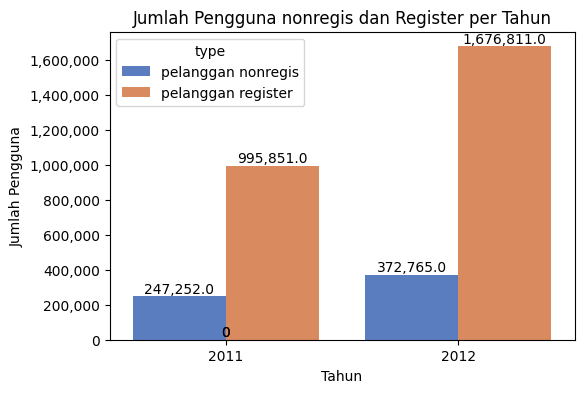

In [41]:
# Group by berdasarkan tahun kemudian tampung kedalam variable
df_grouped = df_jam.groupby(by='tahun').agg({
    'pelanggan nonregis': 'sum',
    'pelanggan register': 'sum'
}).reset_index()

# Sesuaikan data menjadi long format (untuk seaborn)
df_melt = df_grouped.melt(id_vars='tahun', value_vars=['pelanggan nonregis', 'pelanggan register'],
                          var_name='type', value_name='sum')

# Membuat figure
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='tahun', y='sum', hue='type', data=df_melt, palette='muted')

# Format angka pada sumbu y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Tambahkan label dan judul
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pengguna')
plt.title('Jumlah Pengguna nonregis dan Register per Tahun')

# Tambahkan jumlah di atas bar
for p in ax.patches:
    # Ambil tinggi bar
    height = p.get_height()
    # Tambahkan teks di atas bar
    ax.annotate(format(height, ','),
                (p.get_x() + p.get_width() / 2., height),
                ha = 'center', va = 'center',
                xytext = (0, 5),  # offset teks di atas bar
                textcoords = 'offset points')

# Tampilkan grafik
plt.show()

**Insight:**
- xxx
- xxx

### Pertanyaan 2: Bagaimana pengaruh cuaca pada jumlah pengguna sepeda ?

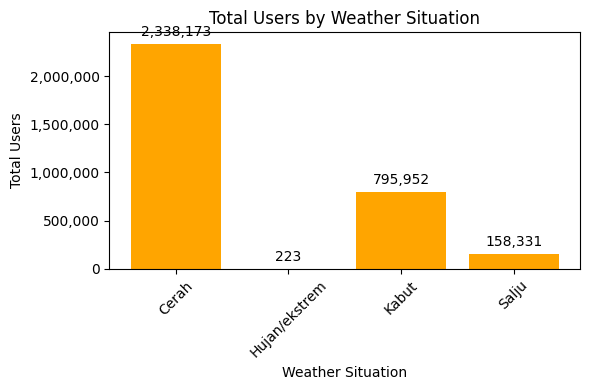

In [42]:
# Group by berdasakran wethersit
df_grouped = df_jam.groupby(by='weathersit').agg({
    'jumlah': 'sum'
}).reset_index()

# Ambil data dari hasil groupby
weathersit = df_grouped['weathersit']
total = df_grouped['jumlah']

# Buat figure dan axis
plt.figure(figsize=(6, 4))

# Plot bar
plt.bar(weathersit, total, color='orange')

# Format angka pada sumbu y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Tambahkan label dan judul
plt.xlabel('Weather Situation')
plt.ylabel('Total Users')
plt.title('Total Users by Weather Situation')

# Tambahkan jumlah di atas bar
for i, value in enumerate(total):
    plt.text(i, value + 50000, format(value, ','), ha='center', va='bottom')

# Tampilkan grafik
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Pertanyaan 3 : Pada jam  berapa pengguna layanan sepeda paling banyak digunakan ?

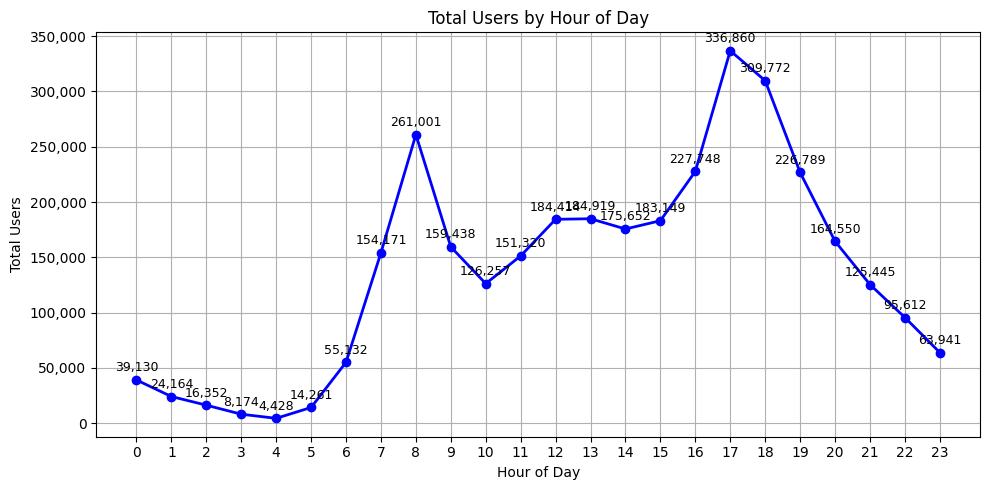

In [43]:
df_grouped = df_jam.groupby(by='jam').agg({
    'jumlah': 'sum'
}).reset_index()

# Ambil data dari hasil groupby
hours = df_grouped['jam']
total = df_grouped['jumlah']

# Buat figure dan axis
plt.figure(figsize=(10, 5))

# Plot line chart
plt.plot(hours, total, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

# Format angka pada sumbu y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Tambahkan label dan judul
plt.xlabel('Hour of Day')
plt.ylabel('Total Users')
plt.title('Total Users by Hour of Day')

# Tambahkan grid untuk membantu pembacaan
plt.grid(True)

# Tambahkan total di setiap titik
for i, value in enumerate(total):
    plt.text(hours[i], value + 5000, format(value, ','), ha='center', va='bottom', fontsize=9)

# Tampilkan grafik
plt.xticks(range(0, 24))  # Set x-axis ticks to show every hour
plt.tight_layout()
plt.show()


## Analisis Lanjutan CLUSTERING

In [44]:
# kategorikan data total
percentiles = df_jam['jumlah'].quantile([0.33, 0.66])

# Tentukan kategori
def categorize_total(total):
    if total <= percentiles[0.33]:
        return 'Rendah'
    elif total <= percentiles[0.66]:
        return 'Sedang'
    else:
        return 'Tinggi'

# Terapkan kategorisasi
df_jam['cluster'] = df_jam['jumlah'].apply(categorize_total)

# Tampilkan sampel dari setiap kategori
sampel_rendah = df_jam[df_jam['cluster'] == 'Rendah'].sample(10)
sampel_sedang = df_jam[df_jam['cluster'] == 'Sedang'].sample(10)
sampel_tinggi = df_jam[df_jam['cluster'] == 'Tinggi'].sample(10)

print("Sampel Rendah:")
print(sampel_rendah[['jumlah', 'cluster']])

print("\nSampel Sedang:")
print(sampel_sedang[['jumlah', 'cluster']])

print("\nSampel Tinggi:")
print(sampel_tinggi[['jumlah', 'cluster']])

Sampel Rendah:
       jumlah cluster
17044      47  Rendah
1995       16  Rendah
6612       45  Rendah
4255       30  Rendah
5848        4  Rendah
11494      16  Rendah
6322       29  Rendah
167         2  Rendah
13992      11  Rendah
8511       62  Rendah

Sampel Sedang:
       jumlah cluster
12499     158  Sedang
121        95  Sedang
5105      210  Sedang
8357      127  Sedang
11105     158  Sedang
9205      153  Sedang
2974      174  Sedang
13697     148  Sedang
358        79  Sedang
9549      212  Sedang

Sampel Tinggi:
       jumlah cluster
12798     236  Tinggi
11522     349  Tinggi
16336     329  Tinggi
3706      481  Tinggi
7296      343  Tinggi
3826      476  Tinggi
4262      263  Tinggi
7488      310  Tinggi
12498     230  Tinggi
5981      339  Tinggi


## Conclusion

**Conclution pertanyaan 1** : trend pengguna layanan sepeda pada tahun 2011 dan 2012 adalah sebagai berikut  

- 2011

pengguna teregristrasi sebanyak = 995,851

pengguna non teregistrasi (casual) sebanyak = 247,252
- 2012

pengguna teregristrasi sebanyak = 1,676,811

pengguna non teregistrasi (casual) sebanyak = 372,765

hal ini manandakan bahwa pada tahun 2012 jumlah pengguna yang teregristrasi maupun yang tidak mengalami peningkatan

**Conclution pertanyaan 2** : dari hasil analisa yang telah dilakukan dapat di simpulkan bahwa pelanggan lebih memilih cuaca cerah saat menyewa sepeda,dan diikuti oleh cuaca kabut,salju dan hujam extreme


**Conclution pertanyaan 3** : Berdasarkan grafik trend perbandingan setiap jam terlihat jelas jam paling tinggi pengguna sepeda adalah jam 17 dengan total : 336860, Sedangkan jam 4 adalah yang terendah dengan total : 4428